# loss categorical_crossentropy

2가지 crossentropy 사용 방법
- categorical_crossentropy
- sparse_categorical_crossentropy

## categorical_crossentropy
y의 값이 one hot encoding인 경우
```
1,0,0
0,1,0
0,0,1
```

출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어
```

loss 설정
```
model.compile(..., loss='categorical_crossentropy')
```


## sparse_categorical_crossentropy
y의 값이 one hot encoding인 경우
```
0
1
2
```

출력 레이어 설정
```
model.add(Dense(3, activation="softmax")) # 출력 레이어. 1이 아니라 클래스 수 3
```

loss 설정
```
model.compile(..., loss='sparse_categorical_crossentropy')
```





# iris_dnn with category index

아래의 코드는 dnn_iris_and_optimizer.ipynb의 코드를 기반으로 한다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [2]:
# !wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv
  

# 실습용 데이터 받기

In [3]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv

--2021-11-26 08:39:20--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/library/flawed_iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2782 (2.7K) [text/plain]
Saving to: ‘flawed_iris.csv.10’

flawed_iris.csv.10  100%[===================>]   2.72K  --.-KB/s    in 0s      

2021-11-26 08:39:20 (22.2 MB/s) - ‘flawed_iris.csv.10’ saved [2782/2782]



In [4]:
iris = pd.read_csv("flawed_iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,color,class
0,6.4,2.8,5.6,2.2,light,2.0
1,5.0,2.3,3.3,1.0,medium,1.0
2,4.9,2.5,4.5,1.7,medium,2.0
3,4.9,3.1,1.5,0.1,dark,0.0
4,5.7,3.8,1.7,0.3,dark,0.0


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   color          117 non-null    object 
 5   class          119 non-null    float64
dtypes: float64(4), object(2)
memory usage: 5.8+ KB


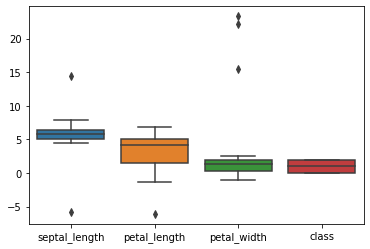

In [6]:
sns.boxplot(data = iris)
plt.show()

### 전처리

In [7]:
# color 컬럼 제거
iris.drop(columns='color', inplace=True)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    object 
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   class          119 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.8+ KB


In [8]:
# 2..3 인 문자 2.3 으로치환
iris.loc[iris.septal_width == '2..3', 'septal_width'] = '2.3'
# septal_width 타입 변환
iris.septal_width = iris.septal_width.astype(float)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  117 non-null    float64
 1   septal_width   118 non-null    float64
 2   petal_length   117 non-null    float64
 3   petal_width    118 non-null    float64
 4   class          119 non-null    float64
dtypes: float64(5)
memory usage: 4.8 KB


In [9]:
iris.describe()

,septal_length,septal_width,petal_length,petal_width,class
count,117.000000,118.000000,117.000000,118.000000,119.000000
mean,5.809402,3.238983,3.523077,1.683051,0.957983
std,1.597735,1.762576,2.102682,3.172567,0.817136
min,-5.800000,-3.000000,-6.100000,-1.000000,0.000000
25%,5.000000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.200000,1.350000,1.000000
75%,6.400000,3.400000,5.100000,1.900000,2.000000
max,14.500000,16.000000,6.900000,23.300000,2.000000


In [10]:
# - 값 처리
iris = iris.abs()
iris.describe()

,septal_length,septal_width,petal_length,petal_width,class
count,117.000000,118.000000,117.000000,118.00000,119.000000
mean,5.908547,3.289831,3.673504,1.70000,0.957983
std,1.175143,1.664891,1.824658,3.16344,0.817136
min,4.400000,2.200000,1.000000,0.10000,0.000000
25%,5.100000,2.800000,1.500000,0.30000,0.000000
50%,5.800000,3.000000,4.400000,1.35000,1.000000
75%,6.400000,3.400000,5.100000,1.90000,2.000000
max,14.500000,16.000000,6.900000,23.30000,2.000000


In [11]:
# 결측치 제거 - 평균 대입
iris = iris.fillna(iris.mean())
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   class          120 non-null    float64
dtypes: float64(5)
memory usage: 4.8 KB


In [12]:
import seaborn as sns

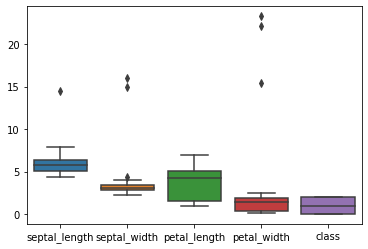

In [13]:
sns.boxplot(data = iris)
plt.show()

In [14]:
# # 이상치 idx 추출
# outlier_idx = iris.loc[iris.petal_width >= 10, 'petal_width'].index

# # 이상치 중에서 가장 작은 값
# outlier_min = iris.loc[iris.petal_width >= 10, 'petal_width'].min()

# # 정상 범위 가장 큰 값
# normal_max = iris.loc[iris.petal_width < 10, 'petal_width'].max()
# # 이상치 치환
# iris.loc[iris.petal_width >= 10, 'petal_width'] = normal_max

In [15]:
# iris.loc[iris.septal_length < 10, 'septal_length'].max()

In [16]:
iris.describe()['septal_length']['25%']

5.1

In [17]:
# 이상치 처리 메서드 만들기
def outlier_del(list):
    for i in list:
        Q1 = iris.describe()[i]['25%']
        Q3 = iris.describe()[i]['75%']
        IQR = Q3 - Q1
        top_value = Q3 + (1.5*IQR)
        outlier_min = iris.loc[iris[i] >= top_value, i].min()
        normal_max = iris.loc[iris[i] < outlier_min, i].max()
        iris.loc[iris[i] >= top_value, i] = normal_max
    sns.boxplot(data = iris)
    plt.show()
    iris.info()

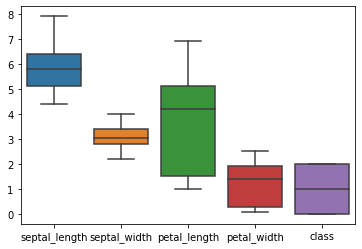

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   class          120 non-null    float64
dtypes: float64(5)
memory usage: 4.8 KB


In [18]:
list_col = ['septal_length', 'septal_width', 'petal_width']
outlier_del(list_col)

In [19]:
# class 타입 변환
iris['class'] = iris['class'].astype(int)
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   class          120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


# Normalization

In [20]:
iris = (iris - iris.min()) / (iris.max() - iris.min())

In [21]:
iris.info()

### ML 단계

In [22]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [23]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [24]:
model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax")) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 154ms/step - loss: 0.0676 - accuracy: 1.0000
loss= 0.06759004294872284
acc= 1.0


In [25]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9912006e-01 8.7980978e-04 7.2468623e-08]
 [2.6200926e-03 9.6896720e-01 2.8412662e-02]
 [8.7026817e-01 1.2925687e-01 4.7495859e-04]
 [2.0392369e-04 9.5708925e-01 4.2706870e-02]
 [9.9869674e-01 1.3031940e-03 1.1993168e-07]
 [9.9959344e-01 4.0656439e-04 1.6365421e-08]
 [9.9962687e-01 3.7308325e-04 1.2221196e-08]
 [9.9643540e-01 3.5634867e-03 1.0263992e-06]
 [2.0403930e-03 9.8005116e-01 1.7908501e-02]
 [9.9817836e-01 1.8213622e-03 2.1807570e-07]
 [3.8730494e-07 4.5425877e-01 5.4574084e-01]
 [9.3348659e-05 9.1741794e-01 8.2488671e-02]
 [9.9865985e-01 1.3400804e-03 1.2669717e-07]
 [2.6657286e-11 3.2452289e-02 9.6754777e-01]
 [9.9837613e-01 1.6237336e-03 1.7803417e-07]
 [6.7799092e-06 7.1896601e-01 2.8102717e-01]
 [2.2788325e-03 9.8436141e-01 1.3359676e-02]
 [9.9788159e-01 2.1179758e-03 3.9426135e-07]
 [9.9909174e-01 9.0808584e-04 7.7059674e-08]
 [8.6556718e-04 9.6805900e-01 3.1075515e-02]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


# 데이터 준비

In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   class          120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [27]:
iris.columns

Index(['septal_length', 'septal_width', 'petal_length', 'petal_width',
       'class'],
      dtype='object')

In [28]:
data_x = iris.loc[:, ['septal_length', 'septal_width', 'petal_length', 'petal_width']]
data_y = iris.loc[:, 'class' ]

In [29]:
data_x.head()

,septal_length,septal_width,petal_length,petal_width
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [30]:
data_y.head()

0    2
1    1
2    2
3    0
4    0
Name: class, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state=321)

In [32]:
train_x

,septal_length,septal_width,petal_length,petal_width
25,5.2,3.5,1.500000,0.2
80,5.4,3.7,1.500000,0.2
104,5.0,3.4,1.600000,0.4
28,5.4,3.0,4.500000,1.5
60,5.6,2.5,3.900000,1.1
...,...,...,...,...
72,5.5,3.5,1.300000,0.2
41,5.8,2.7,5.100000,1.9
31,5.1,2.5,3.000000,1.1
26,5.8,2.6,4.000000,1.2


In [33]:
train_y

25     0
80     0
104    0
28     1
60     1
      ..
72     0
41     2
31     1
26     1
116    1
Name: class, Length: 80, dtype: int64

In [34]:
test_y

46     0
81     1
32     1
69     0
6      0
99     0
8      1
114    0
78     1
22     0
58     2
45     2
103    1
66     0
56     2
65     2
36     2
67     2
53     0
76     1
21     1
57     2
100    0
111    1
15     1
113    2
94     2
71     1
105    0
20     1
23     2
35     2
44     0
107    0
92     0
42     2
68     2
77     1
74     2
51     1
Name: class, dtype: int64

In [35]:
test_x

,septal_length,septal_width,petal_length,petal_width
46,4.8,3.400000,1.6,0.2
81,6.1,2.900000,4.7,2.5
32,6.4,3.200000,4.5,1.5
69,5.0,3.400000,1.5,0.2
6,5.4,3.400000,1.5,0.4
99,5.1,3.800000,1.6,0.2
8,6.7,3.100000,4.4,1.4
114,5.0,3.500000,1.6,0.6
78,6.0,2.900000,4.5,1.5
22,5.4,3.900000,1.3,0.4


# 학습과 예측 실행

In [36]:
from sklearn.linear_model import LogisticRegression #Logistic(Regression)Classifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.svm import SVC #Support Vector Machine
from sklearn.naive_bayes import GaussianNB #Naive Bayesian
from sklearn.neighbors import KNeighborsClassifier #K Nearest Neighbor
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosing
from sklearn.neural_network import MLPClassifier #Neural Network



In [37]:
#logistic (Regression) Classifier, Decision tree, support vector machine, naive bayesian, K Nearest Neighbor, Random Forest, Gradient Boosing, Neural Network
models = []
models.append(("LR", LogisticRegression()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("GB", GradientBoostingClassifier()))
models.append(("ANN", MLPClassifier()))

In [38]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(train_x, train_y.values.ravel())
    predicted_y = model.predict(test_x)
    print(name, "'s Accuracy is ", accuracy_score(test_y, predicted_y))

LR 's Accuracy is  0.9
DT 's Accuracy is  0.9
SVM 's Accuracy is  0.9
NB 's Accuracy is  0.875
KNN 's Accuracy is  0.925
RF 's Accuracy is  0.875
GB 's Accuracy is  0.875
ANN 's Accuracy is  0.9


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
